## Importing libraries

In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

## Data Generation

In [3]:
X,Y = make_classification(n_samples=400,n_classes=2,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,random_state=3)

In [4]:
# convert our Y-Labels into {1, -1}
Y[Y==0] = -1

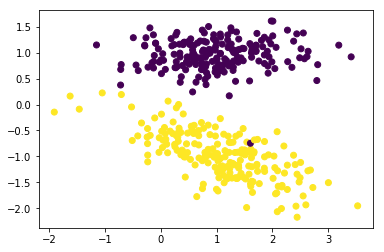

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

## SVM Class

In [6]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hinge_loss(self,W,b,X,Y):
        loss = 0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        # Init the model parameters
        
        W = np.zeros((1,no_of_features))
        bias = 0
        
        # Training from here...
        # Weight and Bias update rule
        
        losses = []
        
        for itr in range(maxItr):
            # Training loop
            
            l = self.hinge_loss(W,bias,X,Y)
            losses.append(l)
            
            # Batch Gradient Descent with random shuffling
            
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,no_of_samples,batch_size):
                # Assume zero gradient for the batch
                gradw = 0
                gradb = 0
                
                # Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                # Gradient for the batch is ready
                W = W - n*W + n*gradw
                bias = bias + n*gradb
        
        self.W = W
        self.b = bias
        return W,bias,losses

## Training our model

In [22]:
mySVM = SVM(C=1)

In [23]:
W,b,losses = mySVM.fit(X,Y)

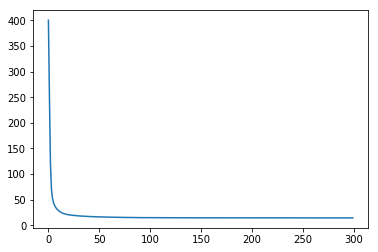

In [24]:
plt.plot(losses)
plt.show()

## Decision boundary

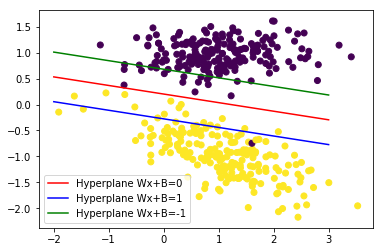

In [25]:
def plotHyperplane(w1,w2,b):
    
    x1 = np.linspace(-2,3,10)
    x2 = -(x1*w1+b)/w2
    xp = (1-(x1*w1+b))/w2
    xn = (-1-(x1*w1+b))/w2
    
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.plot(x1,x2,c='red',label="Hyperplane Wx+B=0")
    plt.plot(x1,xp,c='blue',label="Hyperplane Wx+B=1")
    plt.plot(x1,xn,c='green',label="Hyperplane Wx+B=-1")
    plt.legend()
    plt.show()
    
plotHyperplane(W[0][0],W[0][1],b)

## Effect of high penalty constant

In [34]:
mySVM2 = SVM(C=1000)

In [35]:
W,b,losses = mySVM2.fit(X,Y)

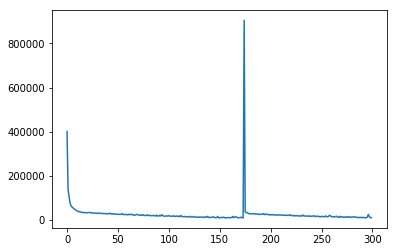

In [36]:
plt.plot(losses)
plt.show()

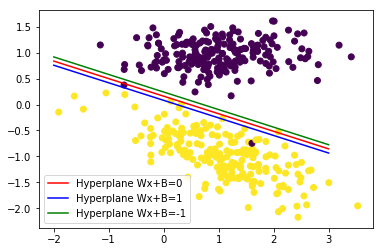

In [37]:
plotHyperplane(W[0][0],W[0][1],b)